#ASSIGMENT 4



HANUT BHATT   
                  21BCT0272

#Import Libraries


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder ,StandardScaler

#Import Dataset

In [4]:
df=pd.read_csv("/WA_Fn-UseC_-HR-Employee-Attrition")

In [11]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#Check the null values

In [6]:
df.shape

(1470, 35)

In [13]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [15]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

*NO NULL VALUES EXIST*

#Data Visualization

Let's visualize some of the data, for

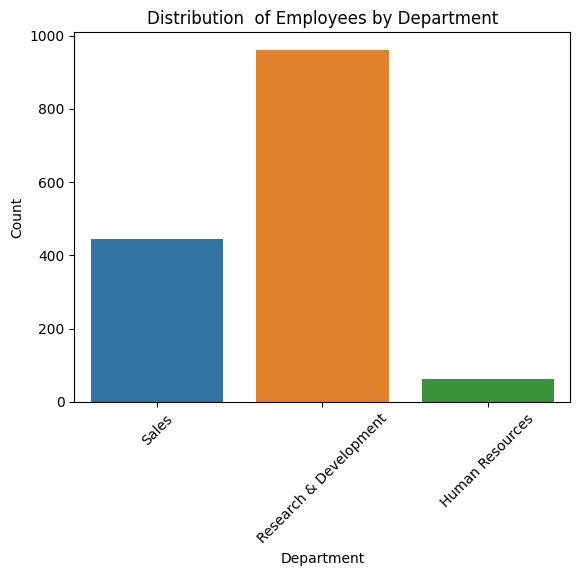

In [20]:
#Example: Countplot for 'Department'
sns.countplot(x='Department',data=df)
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Distribution  of Employees by Department')
plt.xticks(rotation=45)
plt.show()

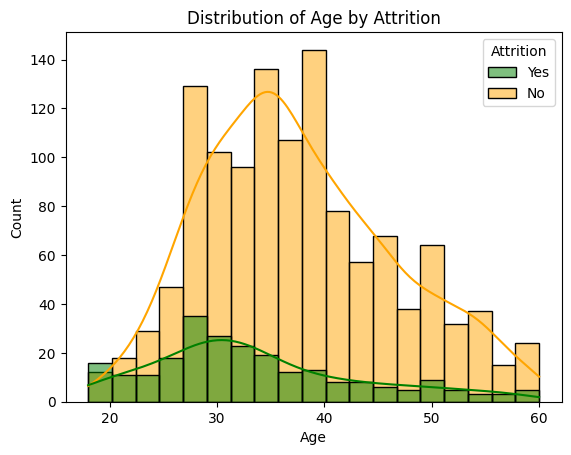

In [32]:
#Example: Distribution of Age
sns.histplot(data=df, x='Age',palette=('green','orange'), hue='Attrition', kde=True)
plt.title('Distribution of Age by Attrition')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

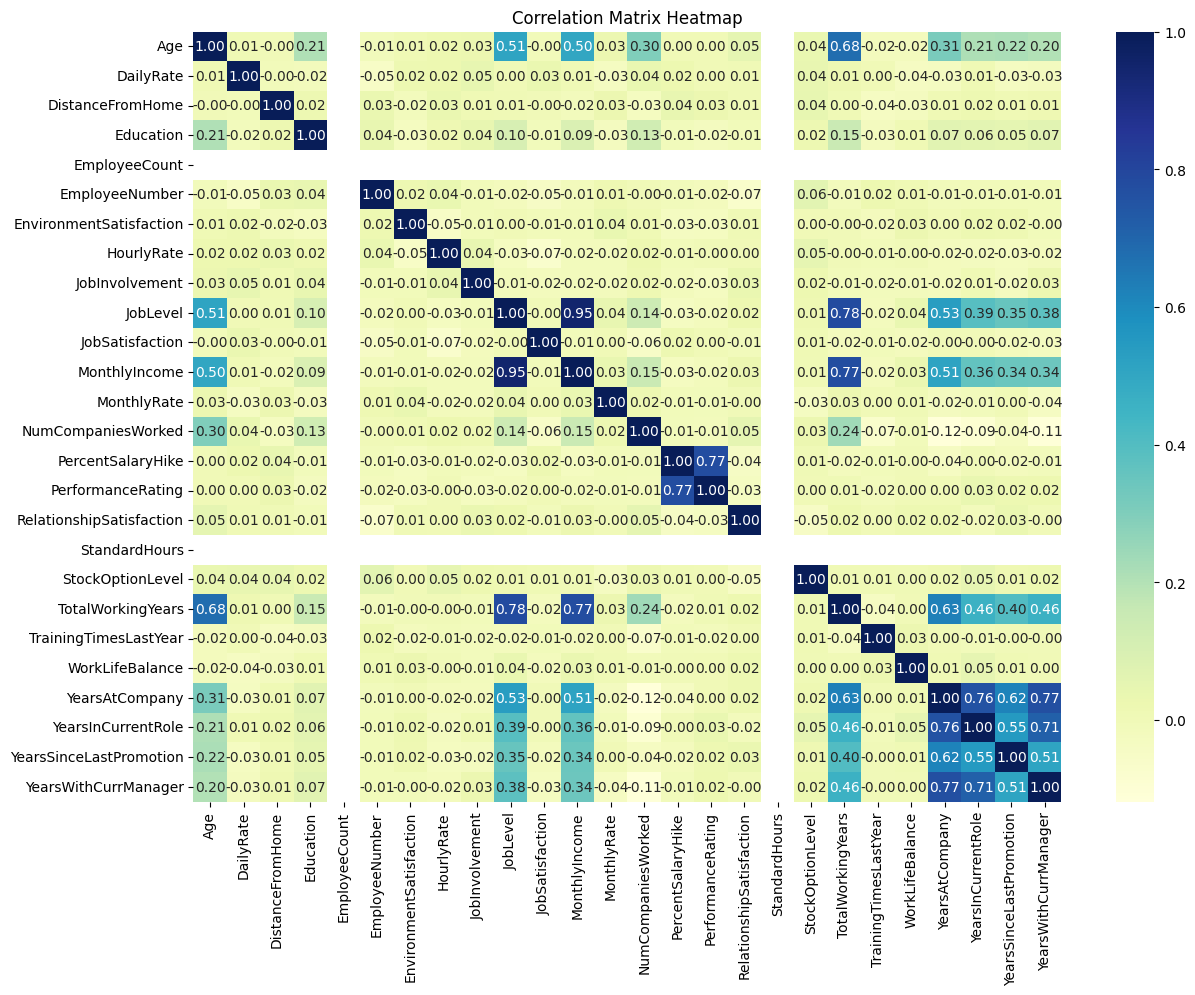

In [36]:
# Calulate the Correlation matrix and Create a heatmap of the Correlation Heatmap
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

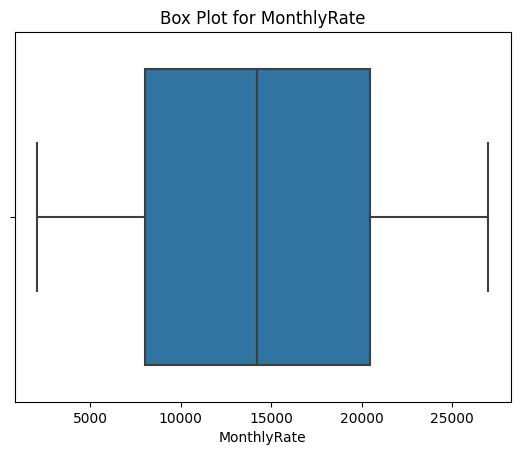

In [82]:
#Example  : Box plot for MonthlyRate
sns.boxplot(x='MonthlyRate', data=df)
plt.xlabel("MonthlyRate")
plt.title('Box Plot for MonthlyRate')
plt.show()

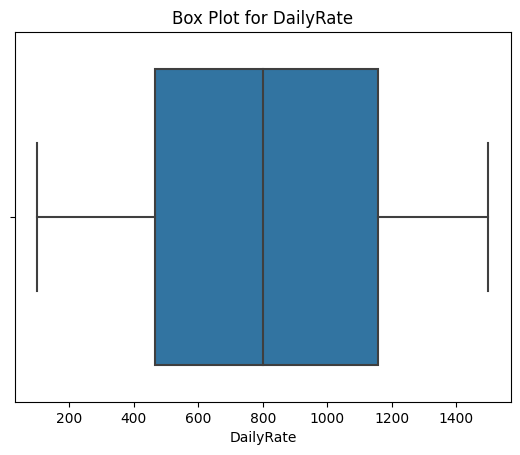

In [42]:
#Example  : Box plot for DailyRate
sns.boxplot(x='DailyRate', data=df)
plt.xlabel("DailyRate")
plt.title('Box Plot for DailyRate')
plt.show()

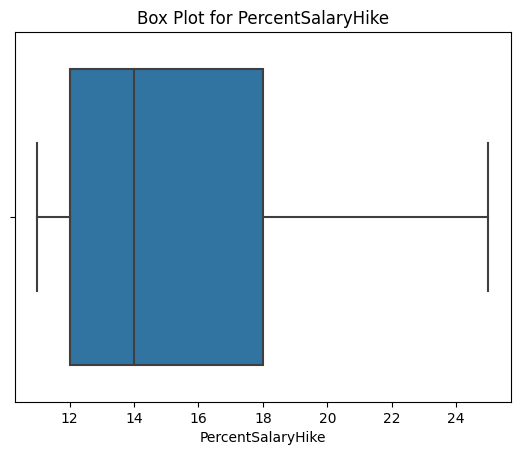

In [44]:
#Example  : Box plot for PercentSalaryHike
sns.boxplot(x='PercentSalaryHike', data=df)
plt.xlabel("PercentSalaryHike")
plt.title('Box Plot for PercentSalaryHike')
plt.show()

*No outliners exist*

#Splitting Dependent and Independent  Variables

In [48]:
X=df.drop("Attrition" , axis=1) #Independednt Variable
Y=df["Attrition"] # Dependent Variable

In [49]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [51]:
Y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

Perform Encoding

In [54]:
X_en= pd.get_dummies(X,drop_first=True)

In [55]:
X_en

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,1,0,0,0,0,0,0,1,0,0
1466,39,613,6,1,1,2062,4,42,2,3,...,0,0,0,0,0,0,0,1,0,0
1467,27,155,4,3,1,2064,2,87,4,2,...,0,0,1,0,0,0,0,1,0,1
1468,49,1023,2,3,1,2065,4,63,2,2,...,0,0,0,0,0,1,0,1,0,0


Scaling

In [143]:
scaler = StandardScaler()
X_en[['Age', 'DailyRate','HourlyRate','DistanceFromHome','MonthlyIncome','MonthlyRate']] = scaler.fit_transform(X_en[['Age', 'DailyRate','HourlyRate','DistanceFromHome','MonthlyIncome','MonthlyRate']])

#Splitting Data into Train and Test

In [144]:
X_train ,X_test,Y_train ,Y_test =train_test_split(X_en,Y,test_size=0.2,random_state=42)

In [145]:
X_train.shape,X_test.shape,Y_train.shape ,Y_test.shape

((1176, 47), (294, 47), (1176,), (294,))

#Model building

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


Logistic Regression

In [147]:
logistic_model= LogisticRegression(random_state=10)
logistic_model.fit(X_train , Y_train)
logistic_pred = logistic_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [148]:
# Evaluaiton of  Logistic regression model
logistic_accuracy = accuracy_score(Y_test, logistic_pred)
logistic_report = classification_report(Y_test,logistic_pred)

print("Logistic Regression Model Accuracy",logistic_accuracy)
print("Logistic Regression Model Classification Report:")
print(logistic_report)

Logistic Regression Model Accuracy 0.9013605442176871
Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

          No       0.91      0.99      0.95       255
         Yes       0.81      0.33      0.47        39

    accuracy                           0.90       294
   macro avg       0.86      0.66      0.71       294
weighted avg       0.89      0.90      0.88       294



Decision Tree

In [149]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, Y_train)
tree_predictions = tree_model.predict(X_test)

In [150]:
#Evaluation of Decision Tree model
tree_accuracy = accuracy_score(Y_test, tree_predictions)
tree_report = classification_report(Y_test, tree_predictions)

print("Decision Tree Model Accuracy:", tree_accuracy)
print("Decision Tree Model Classification Report:")
print(tree_report)

Decision Tree Model Accuracy: 0.7789115646258503
Decision Tree Model Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.87      0.87       255
         Yes       0.17      0.18      0.18        39

    accuracy                           0.78       294
   macro avg       0.52      0.53      0.52       294
weighted avg       0.78      0.78      0.78       294



Random Foret

In [152]:
forest_model = RandomForestClassifier()
forest_model.fit(X_train, Y_train)
forest_predictions = forest_model.predict(X_test)

In [154]:
random_forest_accuracy = accuracy_score(Y_test, forest_predictions)
random_forest_report = classification_report(Y_test, forest_predictions)

print("Random Forest Model Accuracy:", random_forest_accuracy)
print("Random Forest Model Classification Report:")
print(random_forest_report)

Random Forest Model Accuracy: 0.8809523809523809
Random Forest Model Classification Report:
              precision    recall  f1-score   support

          No       0.88      1.00      0.94       255
         Yes       1.00      0.10      0.19        39

    accuracy                           0.88       294
   macro avg       0.94      0.55      0.56       294
weighted avg       0.90      0.88      0.84       294

